<a href="https://colab.research.google.com/github/spsi-gh/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
from pathlib import Path
import requests
import zipfile

books_dir = Path("Books Data/")
if books_dir.is_dir():
  print(f"{books_dir} already exists, skipping download...")
else:
  books_dir.mkdir()

with open(books_dir/"data.zip", "wb") as f:
  request = requests.get("https://github.com/spsi-gh/Book-Recommendation-System/raw/main/data.zip")
  f.write(request.content)

with zipfile.ZipFile(books_dir/"data.zip", "r") as zip_ref:
  print("Unzipping Data...")
  zip_ref.extractall(books_dir)

Books Data already exists, skipping download...
Unzipping Data...


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
books = pd.read_csv(books_dir/'Books.csv')
ratings = pd.read_csv(books_dir/'Ratings.csv')
users = pd.read_csv(books_dir/'Users.csv')

/tmp/ipython-input-9-1630438711.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(books_dir/'Books.csv')


In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
books.shape, ratings.shape, users.shape

((271360, 8), (1149780, 3), (278858, 3))

In [9]:
# Using ratings df for collaborative and books df for content based

## Collaborative Filtering

In [10]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [12]:
ratings['Book-Rating'].describe()

,Book-Rating
count,1.149780e+06
mean,2.866950e+00
std,3.854184e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,7.000000e+00
max,1.000000e+01


In [13]:
ratings['User-ID'].value_counts() #checking for most active user

,count
User-ID,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
116180,1
116166,1
116154,1


In [14]:
ratings['Book-Rating'].value_counts()

,count
Book-Rating,
0,716109
8,103736
10,78610
7,76457
9,67541
5,50974
6,36924
4,8904
3,5996


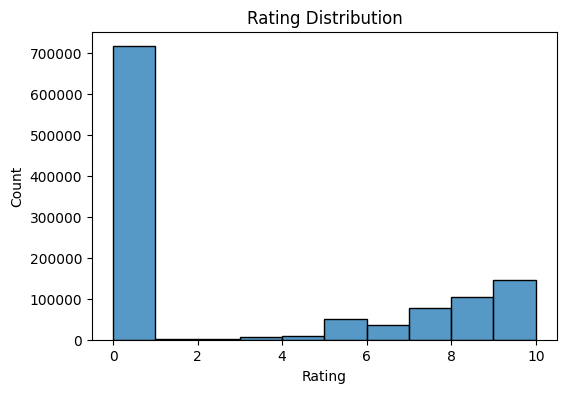

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(ratings, x= 'Book-Rating', bins = 10, kde=False)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [16]:
ratings_clean = ratings[ratings['Book-Rating'] > 0]

In [17]:
active_users = ratings_clean['User-ID'].value_counts()
active_users = active_users[active_users >= 50].index
ratings_clean = ratings_clean[ratings_clean['User-ID'].isin(active_users)]

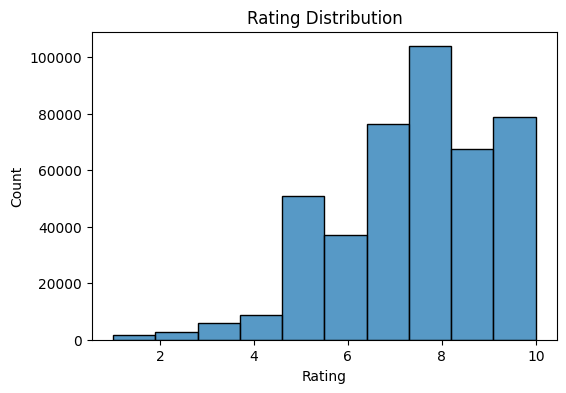

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(ratings_clean, x= 'Book-Rating', bins = 10, kde=False)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [18]:
top_books = ratings_clean['ISBN'].value_counts().head(10)

In [19]:
!pip install scikit-surprise

In [19]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

In [22]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_clean[['User-ID', 'ISBN', 'Book-Rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


In [23]:
model_knn = KNNBasic()
model_knn.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [24]:
books_clean = books.copy()
def recommend_books_for_user(user_id, model, n=5):
    rated_books = ratings_clean[ratings_clean['User-ID'] == user_id]['ISBN'].tolist()
    all_books = ratings_clean['ISBN'].unique()
    unrated_books = [isbn for isbn in all_books if isbn not in rated_books]

    predictions = [model.predict(user_id, isbn) for isbn in unrated_books]
    top_preds = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    return pd.DataFrame({
        'ISBN': [p.iid for p in top_preds],
        'Predicted Rating': [round(p.est, 2) for p in top_preds]
    }).merge(books_clean[['ISBN', 'Book-Title']], on='ISBN', how='left')

In [25]:
recommend_books_for_user(276729, model_knn)

,ISBN,Predicted Rating,Book-Title
0,030700645X,7.8,"Eeyore, Be Happy (Little Golden Book)"
1,0307127923,7.8,Disney's The Lion King (A Golden Look-Look Book)
2,0307302016,7.8,Winnie the Pooh and the Honey Tree (Little Gol...
3,0307302636,7.8,The Grand and Wonderful Day (Little Golden Book)
4,0307987655,7.8,"Eeyore, You're the Best (Disney's Pooh)"


## Content-Based Filtering

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

In [35]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [36]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [37]:
books_clean = books.copy()
books_clean['Book-Author'] = books_clean['Book-Author'].fillna('Unknown')

In [38]:
books_clean['Book-Title'].duplicated().sum()

np.int64(29225)

In [39]:
# books_clean['Book-Title'] = books_clean['Book-Title'].str.lower().str.strip()
books_clean = books_clean.drop_duplicates(subset='Book-Title', keep='first')


In [40]:
top_authors = books_clean['Book-Author'].value_counts().head(10)
top_authors

,count
Book-Author,
William Shakespeare,491
Agatha Christie,467
Ann M. Martin,390
Carolyn Keene,371
Francine Pascal,339
Stephen King,327
Barbara Cartland,292
Isaac Asimov,278
Not Applicable (Na ),276


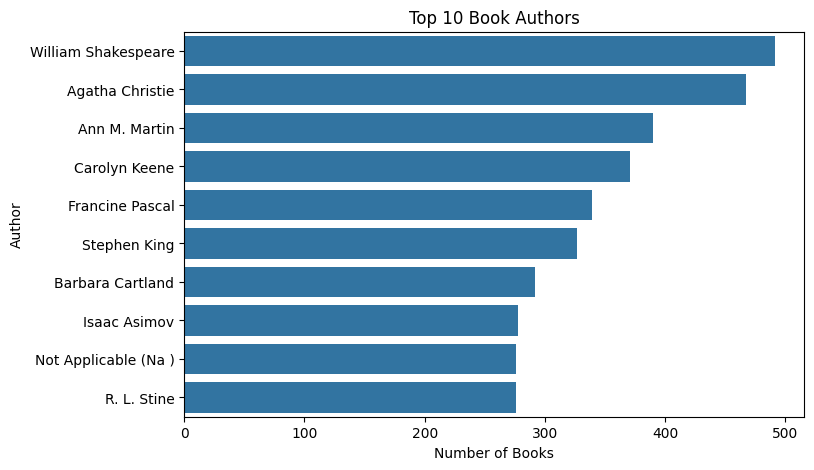

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title("Top 10 Book Authors")
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.show()

In [42]:
books_clean.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [43]:
content_features = books_clean[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication']]

In [44]:
content_features['combined'] = content_features['Book-Title'] + ' ' + content_features['Book-Author']

/tmp/ipython-input-44-864117413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_features['combined'] = content_features['Book-Title'] + ' ' + content_features['Book-Author']


In [52]:
content_features.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,combined
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Flashpoints: Promise and Peril in a New World ...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,From One to One Hundred Teri Sloat
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,Lily Dale : The True Story of the Town that Ta...
271358,0192126040,Republic (World's Classics),Plato,1996,Republic (World's Classics) Plato
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,A Guided Tour of Rene Descartes' Meditations o...


In [46]:
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(content_features['combined'])

In [47]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [48]:
def recommend_similar_books(title, top_n=5):
    title = title.lower()
    matches = content_features[content_features['Book-Title'].str.lower() == title]
    if matches.empty:
        return "Book not found."
    idx = matches.index[0]
    distances, indices = model_knn.kneighbors(tfidf_matrix[idx], n_neighbors=top_n+1)
    return content_features.iloc[indices[0][1:]][['Book-Title', 'ISBN']]

In [49]:
recommend_similar_books("Harry Potter and the Sorcerer's Stone")

,Book-Title,ISBN
34919,Day In April (Silhouette Big Summer Read),0373482442
92792,His Touch,1551666863
73775,Without You (Mira),0778320510
53258,ONE SUMMER EVENING,1551665239
10063,Like Silk,1551669021


In [50]:
# !pip install numpy<2

In [51]:
# !pip uninstall numpy -y
# !pip install numpy==1.24.4